In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
X, y= load_digits(return_X_y=True)
print(X)
print('------------------------------------')
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
------------------------------------
[0 1 2 ... 8 9 8]


In [ ]:
y_test = [7, 14, 7, 30, 39, 41, 0, 44, 2, 15, 29, 9, 40, 21, 37, 8, 19, 13, 10, 42, 24, 4, 42, 29, 23, 30, 27, 27, 16, 26, 15, 27, 39, 12, 25, 19, 45, 37, 19, 8, 15, 28, 20, 14, 36, 2, 35, 13, 32, 37, 36, 29, 38, 34, 23, 31, 19, 8, 19, 5, 13, 35, 38, 20, 23, 26, 30, 1, 44, 18, 40, 41, 3, 12, 2, 37, 34, 37, 30, 3, 28, 23, 33, 26, 46, 45, 34, 43, 12, 6, 19, 4, 25, 35, 31, 46, 31, 41, 14, 17, 42, 40, 35, 31, 1, 40, 35, 10, 33, 36, 21, 27, 42, 3, 17, 25, 43, 38, 9, 31, 23, 24, 31, 27, 0, 1, 24, 38, 9, 14, 13, 1, 34, 32, 35, 42, 7, 43, 8, 22, 7, 11, 27, 9, 14, 11, 2, 19, 10, 2, 20, 18, 27, 42, 13, 8, 10, 22, 1, 34, 43, 9, 8, 12, 46, 38, 6, 7, 19, 3, 20, 32, 4, 5, 12, 9, 10, 15, 6, 18, 41, 38, 45, 21, 45, 27, 7, 4, 36, 11, 0, 14, 43, 21, 32, 17, 11, 44, 32, 17, 29, 37, 6, 5, 44, 17, 29, 39, 5, 24, 20, 25, 36, 26, 5, 26, 32, 44, 30, 17, 5, 30, 25, 33, 1, 28, 25, 22, 9, 46, 38, 27, 45, 16, 42, 3, 3, 44, 46, 28, 41, 10, 15, 20, 26, 14, 18, 45, 39, 21, 7, 5, 16, 33, 6, 22, 28, 24, 14, 16, 8, 0, 23, 36, 18, 36, 37, 45, 10, 37, 16, 27, 1, 22, 36, 31, 22, 42, 3, 20, 39, 18, 11, 32, 40, 15, 5, 0, 1, 11, 33, 13, 1, 39, 31, 2, 5, 2, 33, 46, 37, 17, 34, 26, 45, 41, 36, 8, 31, 16, 35, 14, 13, 24, 6, 20, 2, 30, 0, 40, 2, 21, 29, 42, 28, 12, 4, 34, 28, 18, 7, 43, 4, 20]
y_pred = [7, 14, 7, 30, 39, 41, 42, 44, 2, 36, 44, 9, 40, 21, 17, 45, 19, 13, 10, 36, 10, 4, 42, 29, 23, 30, 27, 27, 16, 37, 15, 27, 9, 12, 25, 36, 28, 37, 17, 8, 36, 1, 20, 14, 36, 2, 35, 13, 32, 37, 36, 29, 38, 9, 23, 31, 36, 8, 44, 5, 4, 35, 17, 20, 23, 31, 30, 1, 44, 0, 14, 41, 3, 35, 0, 37, 34, 37, 27, 3, 28, 23, 33, 26, 46, 45, 35, 43, 12, 10, 19, 4, 25, 35, 31, 46, 31, 41, 14, 8, 42, 40, 38, 31, 1, 40, 35, 17, 3, 36, 21, 27, 42, 3, 24, 7, 43, 38, 7, 31, 23, 44, 31, 27, 7, 7, 24, 38, 9, 29, 16, 1, 43, 32, 35, 42, 7, 1, 8, 31, 7, 20, 27, 3, 14, 9, 2, 19, 10, 2, 20, 18, 27, 0, 13, 8, 10, 22, 1, 37, 32, 9, 8, 12, 46, 38, 6, 7, 19, 3, 20, 40, 4, 5, 12, 9, 10, 15, 11, 18, 41, 38, 45, 21, 43, 27, 7, 4, 36, 10, 29, 14, 43, 21, 31, 17, 19, 45, 32, 17, 29, 37, 6, 5, 44, 17, 29, 39, 5, 24, 20, 26, 36, 26, 5, 26, 32, 44, 36, 17, 24, 30, 25, 33, 19, 24, 25, 22, 0, 46, 38, 27, 27, 16, 42, 3, 3, 44, 46, 10, 41, 5, 15, 20, 26, 14, 18, 45, 34, 21, 7, 5, 16, 33, 29, 34, 24, 24, 14, 16, 8, 42, 23, 36, 18, 36, 37, 45, 10, 37, 16, 27, 1, 35, 36, 31, 22, 42, 3, 37, 4, 18, 1, 32, 45, 15, 5, 0, 0, 7, 33, 13, 1, 39, 31, 2, 5, 0, 33, 46, 37, 17, 0, 26, 36, 41, 36, 8, 31, 16, 35, 14, 21, 24, 13, 20, 2, 30, 37, 40, 2, 21, 29, 18, 28, 12, 4, 5, 28, 18, 7, 1, 4, 20]
#labels = ['AISHWARYA RAI BACHCHAN', 'ALISA', 'ANUSORN', 'CHOTE', 'CRISTIANO RONALDO', 'DAVIKA HOORNE', 'DENPONG', 'DUANGTHIP', 'EMMA CHARLOTTE DUERRE WATSON', 'FRANK WALTER STEINMEIER']
labels = ['AISHWARYA_RAI_BACHCHAN', 'ALISA', 'ANUSORN', 'AYUWAT', 'CHAITHAT_KULCHOKVANICH', 'CHOTE', 'CRISTIANO_RONALDO', 'DAVIKA_HOORNE', 'DENPONG','DUANGTHIP', 'ELVIS_PRESLEY', 'EMMA_CHARLOTTE_DUERRE_WATSON', 'FRANK_WALTER_STEINMEIER', 'FUMIO_KISHIDA', 'GAN', 'GREANTEP', 'HUN_SEN', 'JUTHARAT', 'KANNIKAR', 'KORNCHAWAN', 'KRITSAKORN', 'MICHAEL', 'NAMCHOKE', 'NIGEL', 'NUTTINEE', 'OPRAH_WINFREY', 'PAETONGTARN_SHINAWATRA', 'PANINTORSANG', 'PANTHAPAT', 'PHRONPHUN', 'PRAPAI', 'RAPEERUMPAI', 'SITTIPOL', 'SRETTHA_THAVISIN', 'SUPANAT', 'SUPAPRESERT', 'TACHANAN', 'TAKORN_RATTANAKAMOLPORN', 'TANAWAT', 'THONGLOUN_SISOULITH', 'TOOMTAM', 'TO_LAM', 'TRISUKON', 'WANTHAWIN', 'WETAKA', 'WORAKARN', 'XI JINPING']

# To randomly select 10 class numbers from my dataset

In [ ]:
# Randomly select 10 unique classes from y_test
unique_classes = list(set(y_test))
random_classes = random.sample(unique_classes, 10)

# Map the selected classes to their corresponding labels
random_labels = [labels[i] for i in random_classes]

# Filter y_test and y_pred simultaneously
y_test_filtered = []
y_pred_filtered = []

for actual, predicted in zip(y_test, y_pred):
    if actual in random_classes and predicted in random_classes:
        y_test_filtered.append(actual)
        y_pred_filtered.append(predicted)

print(y_test_filtered)
print(y_pred_filtered)
cm = confusion_matrix(y_test_filtered, y_pred_filtered, labels=random_classes)

[39, 2, 13, 42, 8, 20, 2, 13, 32, 8, 20, 3, 34, 3, 17, 42, 42, 3, 32, 42, 8, 2, 2, 20, 13, 8, 8, 3, 20, 17, 32, 17, 17, 39, 20, 32, 17, 42, 3, 3, 20, 39, 8, 42, 3, 32, 13, 39, 2, 17, 8, 20, 2, 2, 20]
[39, 2, 13, 42, 8, 20, 2, 13, 32, 8, 20, 3, 34, 3, 8, 42, 42, 3, 32, 42, 8, 2, 2, 20, 13, 8, 8, 3, 20, 17, 32, 17, 17, 39, 20, 32, 17, 42, 3, 3, 20, 34, 8, 42, 3, 32, 13, 39, 2, 17, 8, 20, 2, 2, 20]


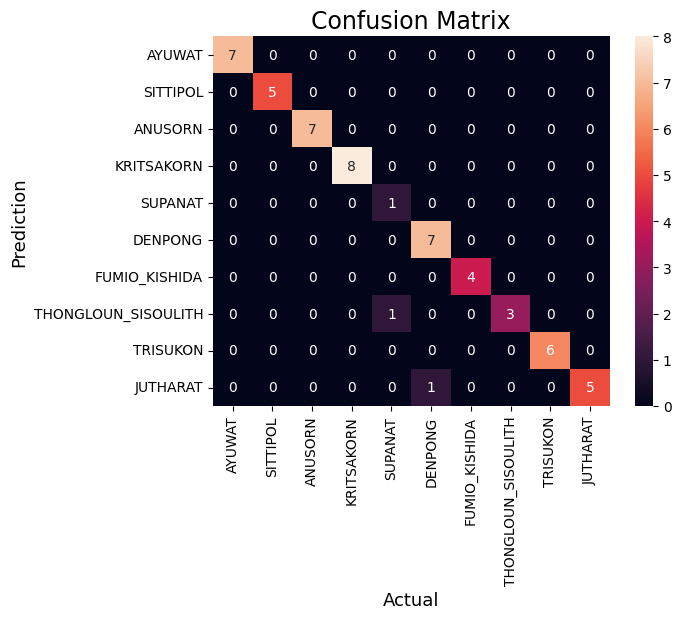

In [ ]:
sns.heatmap(cm,
			annot=True,
			fmt='g',
			xticklabels=random_labels,
			yticklabels=random_labels,
			)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# To select the top 10 classes with the highest counts in my dataset

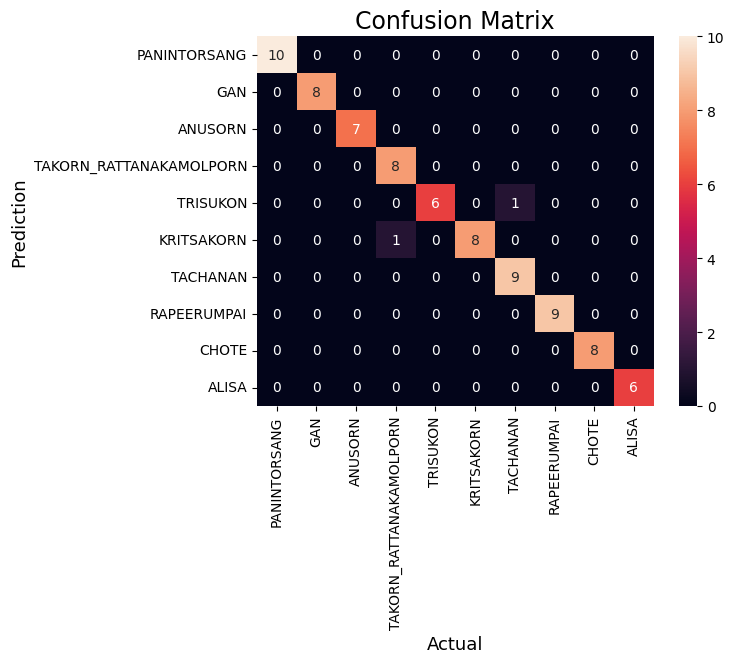

In [ ]:
from collections import Counter

# Step 1: Count the occurrences of each class in y_test
class_counts = Counter(y_test)

# Step 2: Sort the classes based on their counts in descending order and select the top 10
top_10_classes = [class_label for class_label, _ in class_counts.most_common(10)]

# For lowest counts, sort and select the bottom 10 classes
#top_10_classes = [class_label for class_label, _ in class_counts.most_common()[-10:]]

# Step 3: Map the selected classes to their corresponding labels
top_10_labels = [labels[i] for i in top_10_classes]

# Step 4: Filter y_test and y_pred based on the top 10 classes
y_test_filtered = []
y_pred_filtered = []

for actual, predicted in zip(y_test, y_pred):
    if actual in top_10_classes and predicted in top_10_classes:
        y_test_filtered.append(actual)
        y_pred_filtered.append(predicted)

# Step 5: Calculate the confusion matrix with the filtered data
cm = confusion_matrix(y_test_filtered, y_pred_filtered, labels=top_10_classes)

# Plot the confusion matrix with correct labels
sns.heatmap(cm, annot=True, fmt='g', xticklabels=top_10_labels, yticklabels=top_10_labels)
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

Accuracy : 0.7425149700598802


In [4]:
# prompt: read file test_labels.npy

test_labels = np.load('test_labels.npy')
print(test_labels)


[0 1 0 ... 0 1 0]


In [60]:
# prompt: read file Facenet512_opencv_euclidean_unaligned.csv

import pandas as pd
df = pd.read_csv('ArcFace_opencv_cosine_aligned.csv')
print(df)


     actuals  distances
0          0   0.962216
1          1   0.760992
2          0   0.894403
3          1   0.742393
4          0   0.797428
..       ...        ...
995        0   0.737759
996        1   0.152681
997        0   0.955555
998        0   0.998812
999        1   0.936444

[1000 rows x 2 columns]


In [61]:
# prompt: from df, let loop and keep the value in column  distances to y-pred array and keep  the value in column  actuals to y_test array

y_pred = df['distances'].tolist()
y_test = df['actuals'].tolist()


In [62]:
positive_mean = df[(df["actuals"] == True) | (df["actuals"] == 1)]["distances"].mean()
negative_mean = df[(df["actuals"] == False) | (df["actuals"] == 0)]["distances"].mean()

distances = sorted(df["distances"].values.tolist())

items = []
for i, distance in enumerate(distances):
  if distance >= positive_mean and distance <= negative_mean:
      sandbox_df = df.copy()
      sandbox_df["predictions"] = False
      idx = sandbox_df[sandbox_df["distances"] < distance].index
      sandbox_df.loc[idx, "predictions"] = True

      actuals = sandbox_df.actuals.values.tolist()
      predictions = sandbox_df.predictions.values.tolist()
      accuracy = 100*accuracy_score(actuals, predictions)
      items.append((distance, accuracy))

pivot_df = pd.DataFrame(items, columns = ["distance", "accuracy"])
pivot_df = pivot_df.sort_values(by = ["accuracy"], ascending = False)
threshold = pivot_df.iloc[0]["distance"]
print(f"threshold is {threshold}")
accuracy = pivot_df.iloc[0]["accuracy"]

threshold is 0.6495128957609713


In [63]:
# prompt: compute value in y_pred if value more than threshold is 0 else is 1 and keep it in a new array

new_y_pred = [0 if value > threshold else 1 for value in y_pred]
print(new_y_pred)


[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 

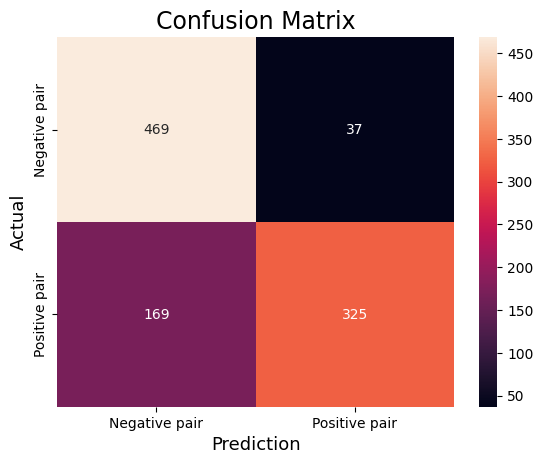

In [64]:
labels = ['Negative pair', 'Positive pair']

from collections import Counter

# Step 1: Count the occurrences of each class in y_test
class_counts = Counter(y_test)

# Step 2: Sort the classes based on their counts in descending order and select the top 10
top_10_classes = [class_label for class_label, _ in class_counts.most_common(10)]

# For lowest counts, sort and select the bottom 10 classes
#top_10_classes = [class_label for class_label, _ in class_counts.most_common()[-10:]]

# Step 3: Map the selected classes to their corresponding labels
top_10_labels = [labels[i] for i in top_10_classes]

# Step 4: Filter y_test and y_pred based on the top 10 classes
y_test_filtered = []
y_pred_filtered = []

for actual, predicted in zip(y_test, new_y_pred):
    if actual in top_10_classes and predicted in top_10_classes:
        y_test_filtered.append(actual)
        y_pred_filtered.append(predicted)

# Step 5: Calculate the confusion matrix with the filtered data
cm = confusion_matrix(y_test_filtered, y_pred_filtered, labels=top_10_classes)

# Plot the confusion matrix with correct labels
sns.heatmap(cm, annot=True, fmt='g', xticklabels=top_10_labels, yticklabels=top_10_labels)
plt.xlabel('Prediction', fontsize=13)
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

359
469
135
37


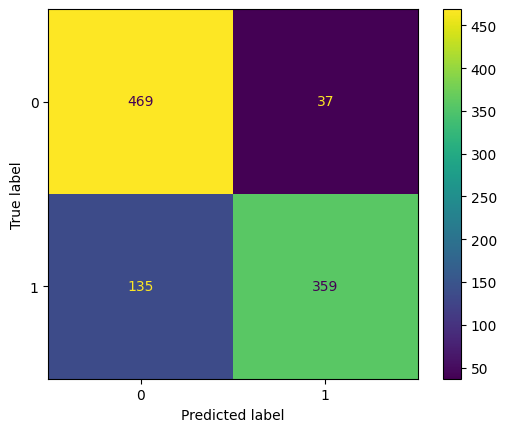

In [27]:
print(cm[1][1])
print(cm[0][0])
print(cm[1][0])
print(cm[0][1])

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=top_10_classes)
disp.plot()
plt.show()